# Import knihoven

🔸import pandas as pd

Práce s tabulkami (DataFrame): načítání CSV/Excel, čištění, filtrování, groupby, spojování tabulek.

🔸import numpy as np

Numerika nad poli (array), vektorizované výpočty, náhodné generování, lineární algebra.

🔸import matplotlib.pyplot as plt

Základní kreslení grafů (čáry, body, histogramy, ROC křivky).

🔸import seaborn as sns

„Nadstavba“ nad matplotlib → hezčí a pohodlné statistické grafy (heatmapy, boxploty, pairploty).

🔸import xgboost as xgb

Knihovna XGBoost (gradient boosting stromy): xgb.XGBClassifier, xgb.XGBRegressor, feature importance, rychlý boosting.

🔸from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score

* train_test_split – rozdělí data na trénovací/testovací sadu.

* GridSearchCV – vyzkouší všechny kombinace hyperparametrů (mřížka) s křížovou validací.

* RandomizedSearchCV – zkouší náhodné kombinace hyperparametrů (rychlejší než grid).

* StratifiedKFold – k-fold CV, která zachovává poměr tříd v každém foldu (pro klasifikaci).

* cross_val_score – rychlý výpočet skóre přes křížovou validaci (bez explicitního Grid/Random search).

🔸from sklearn.preprocessing import StandardScaler, LabelEncoder

* StandardScaler – standardizace numerických znaků (průměr 0, směrodatná odchylka 1).

* LabelEncoder – převod kategoriálního cíle (y) na čísla 0,1,2… (pro vstupní X je vhodnější OneHotEncoder).

🔸from sklearn.linear_model import LinearRegression, LogisticRegression

* LinearRegression – regrese pro spojitou cílovku (MSE, R²).

* LogisticRegression – binární/multitřídní klasifikace (pravděpodobnosti přes sigmoid/softmax).

🔸from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

* RandomForestRegressor – regrese pomocí náhodného lesa (průměr predikcí stromů).

* RandomForestClassifier – klasifikace pomocí náhodného lesa (hlasování stromů).

🔸from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, make_scorer, roc_curve

* mean_squared_error (MSE) – průměr čtvercových chyb (pro regresi).

* r2_score (R²) – vysvětlená variabilita (regrese).

* classification_report – souhrnná tabulka precision/recall/F1/support po třídách.

* accuracy_score – podíl správných predikcí.

* f1_score – harmonický průměr precision a recall.

* roc_auc_score – plocha pod ROC křivkou (AUC).

* precision_score – přesnost „když řeknu 1, jak často mám pravdu“.

* recall_score – citlivost „kolik jedniček jsem našel“.

* make_scorer – vytvoří vlastní metrickou funkci pro Grid/RandomSearchCV (např. F1 s váhami).

* roc_curve – vypočte body ROC křivky (FPR/TPR pro různé thresholdy).

🔸from sklearn.pipeline import Pipeline

Řetězení kroků do jednoho objektu (např. StandardScaler → model). Zajišťuje správné fit/transform v CV.

🔸from scipy.stats import randint

Rozdělení celočíselných hodnot pro RandomizedSearchCV (např. náhodný výběr n_estimators v intervalu).

🔸from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

* confusion_matrix – matice záměn (TP, FP, FN, TN).

* ConfusionMatrixDisplay – pohodlné vykreslení matice záměn jako heatmapy.

In [2]:
# 1. Import knihoven

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, make_scorer, roc_curve
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import dat

In [3]:
!pip install kaggle

!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d zeeshier/weather-forecast-dataset

Dataset URL: https://www.kaggle.com/datasets/zeeshier/weather-forecast-dataset
License(s): CC0-1.0
  0% 0.00/114k [00:00<?, ?B/s]
100% 114k/114k [00:00<00:00, 241MB/s]


In [5]:
!unzip weather-forecast-dataset.zip

Archive:  weather-forecast-dataset.zip
  inflating: weather_forecast_data.csv  


In [6]:
!ls

kaggle.json  weather_forecast_data.csv
sample_data  weather-forecast-dataset.zip


# Načtení a příprava datasetu

In [7]:
df = pd.read_csv("weather_forecast_data.csv")

print("Shape:", df.shape)
df.head()

Shape: (2500, 6)


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [8]:
# 3. Základní info a čištění dat

df.info()
print(df.isna().sum())

# odstranění nebo doplnění NaN
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB
Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


# Exploratory Data Analysis (EDA)

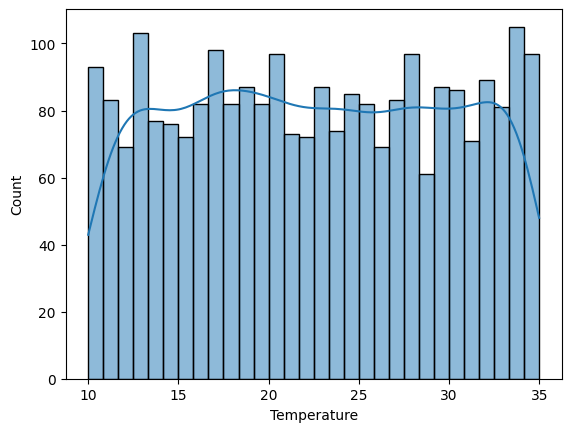

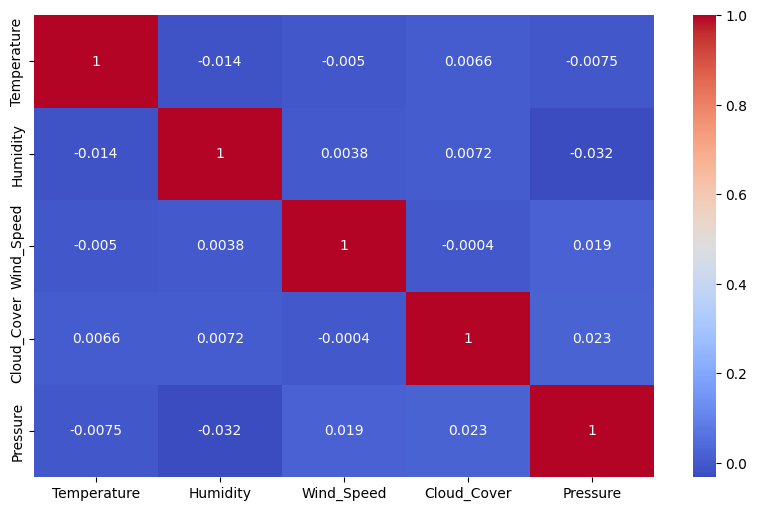

In [9]:
# 4. Exploratory Data Analysis (EDA)

# distribuce teploty
sns.histplot(df['Temperature'], bins=30, kde=True)
plt.show()

# korelační matice
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


Tento blok dělá 2 věci:

Ukáže, jak jsou teploty rozložené (histogram).

Ukáže, jak spolu všechny číselné znaky souvisí (korelační matice).

**Histogram teploty:**


Rozdělení hodnot teploty je poměrně rovnoměrné v intervalu 10–35 °C. Neexistuje žádná výrazná koncentrace na jedné hodnotě, takže model bude mít data z celého rozsahu teplot.

**Korelační matice:**


- Mezi proměnnými Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure nejsou žádné silné korelace (hodnoty blízko 0).

- To znamená, že jednotlivé znaky jsou na sobě relativně nezávislé → každý může přinést samostatnou informaci do modelu.

- Sloupec Rain se nezobrazil, protože není numerický; pokud bychom ho převedli na 0/1, bylo by možné měřit jeho korelaci s ostatními faktory.

**Krátké shrnutí:**

Proměnné jsou navzájem jen slabě závislé a teplota má rovnoměrné rozložení. Dataset proto poskytuje stabilní základ pro trénink predikčního modelu počasí.

# Převod sloupce 'Rain' na 0/1

In [10]:

df["Rain"] = df["Rain"].map({
    "rain": 1,
    "no rain": 0
}).astype(int)

print(df["Rain"].unique())   # [1 0]
print(df["Rain"].value_counts())

[1 0]
Rain
0    2186
1     314
Name: count, dtype: int64


# Vytváření proměnných

In [11]:

y = df["Rain"].astype(int)
X = df.drop(columns=["Rain"])


In [12]:
# 1) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Pomocné funkce hodnocení

In [13]:
def evaluate_clf(model, X_te, y_te, probs_ok=True, name="model"):
    y_pred = model.predict(X_te)
    if probs_ok:
        try:
            y_proba = model.predict_proba(X_te)[:, 1]
            auc = roc_auc_score(y_te, y_proba)
        except Exception:
            auc = np.nan
    else:
        auc = np.nan
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_te, y_pred),
        "Precision": precision_score(y_te, y_pred, zero_division=0),
        "Recall": recall_score(y_te, y_pred, zero_division=0),
        "F1": f1_score(y_te, y_pred, zero_division=0),
        "ROC_AUC": auc
    }

results = []

# BASELINE — Logistic Regression

In [14]:

logreg_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])
logreg_pipe.fit(X_train, y_train)

res_logreg = evaluate_clf(logreg_pipe, X_test, y_test, probs_ok=True, name="LogisticRegression (baseline)")
results.append(res_logreg)

print("=== Logistic Regression (baseline) ===")
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg_pipe.predict(X_test)))

=== Logistic Regression (baseline) ===
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       546
           1       0.67      0.63      0.65        79

    accuracy                           0.91       625
   macro avg       0.81      0.79      0.80       625
weighted avg       0.91      0.91      0.91       625



# RandomForest — baseline (default)

In [15]:
rf_base = RandomForestClassifier(random_state=42, n_estimators=200)
rf_base.fit(X_train, y_train)

res_rf_base = evaluate_clf(rf_base, X_test, y_test, probs_ok=True, name="RandomForest (baseline)")
results.append(res_rf_base)

print("=== RandomForest (baseline) ===")
print(classification_report(y_test, rf_base.predict(X_test)))

=== RandomForest (baseline) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       546
           1       1.00      1.00      1.00        79

    accuracy                           1.00       625
   macro avg       1.00      1.00      1.00       625
weighted avg       1.00      1.00      1.00       625



# RandomForest — GridSearchCV

In [16]:
grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 5, 10, 15],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5, 10]
}
rf_gs = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=grid,
    cv=5,
    n_jobs=-1,
    scoring="f1"
)
rf_gs.fit(X_train, y_train)

best_rf_gs = rf_gs.best_estimator_
res_rf_gs = evaluate_clf(best_rf_gs, X_test, y_test, probs_ok=True, name=f"RandomForest (GridSearch) {rf_gs.best_params_}")
results.append(res_rf_gs)

print("=== RandomForest (GridSearch) ===")
print("Best params:", rf_gs.best_params_)
print(classification_report(y_test, best_rf_gs.predict(X_test)))

=== RandomForest (GridSearch) ===
Best params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       546
           1       1.00      1.00      1.00        79

    accuracy                           1.00       625
   macro avg       1.00      1.00      1.00       625
weighted avg       1.00      1.00      1.00       625



# RandomForest — RandomizedSearchCV

In [17]:
rand_dist = {
    "n_estimators": randint(100, 800),
    "max_depth": [None] + list(range(3, 21)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10)
}
rf_rs = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rand_dist,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring="f1",
    random_state=42
)
rf_rs.fit(X_train, y_train)

best_rf_rs = rf_rs.best_estimator_
res_rf_rs = evaluate_clf(best_rf_rs, X_test, y_test, probs_ok=True, name=f"RandomForest (RandomSearch) {rf_rs.best_params_}")
results.append(res_rf_rs)

print("=== RandomForest (RandomizedSearch) ===")
print("Best params:", rf_rs.best_params_)
print(classification_report(y_test, best_rf_rs.predict(X_test)))

=== RandomForest (RandomizedSearch) ===
Best params: {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 221}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       546
           1       1.00      1.00      1.00        79

    accuracy                           1.00       625
   macro avg       1.00      1.00      1.00       625
weighted avg       1.00      1.00      1.00       625



# XGBoost — baseline

In [18]:

xgb_clf = xgb.XGBClassifier(
    eval_metric="logloss",
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)
xgb_clf.fit(X_train, y_train)

res_xgb = evaluate_clf(xgb_clf, X_test, y_test, probs_ok=True, name="XGBoost (baseline)")
results.append(res_xgb)

print("=== XGBoost (baseline) ===")
print(classification_report(y_test, xgb_clf.predict(X_test)))

=== XGBoost (baseline) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       546
           1       0.98      1.00      0.99        79

    accuracy                           1.00       625
   macro avg       0.99      1.00      0.99       625
weighted avg       1.00      1.00      1.00       625



# Souhrnná tabulka metrik

In [19]:
results_df = pd.DataFrame(results).sort_values(by="F1", ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,RandomForest (baseline),1.0000,1.000000,1.000000,1.000000,1.000000
1,"RandomForest (RandomSearch) {'max_depth': 8, '...",1.0000,1.000000,1.000000,1.000000,1.000000
2,"RandomForest (GridSearch) {'max_depth': None, ...",1.0000,1.000000,1.000000,1.000000,1.000000
3,XGBoost (baseline),0.9968,0.975309,1.000000,0.987500,1.000000
4,LogisticRegression (baseline),0.9136,0.666667,0.632911,0.649351,0.957481


# Stratifikovaná křížová validace (stratified cross-validation)

In [20]:

X = df.drop(columns=["Rain"])
y = df["Rain"].astype(int)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_report(model, X, y, name):
    scorers = {
        "ACC": make_scorer(accuracy_score),
        "F1": make_scorer(f1_score),
        "PREC": make_scorer(precision_score, zero_division=0),
        "REC": make_scorer(recall_score),
        "ROC_AUC": "roc_auc"
    }
    out = {}
    for metric_name, scorer in scorers.items():
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv, n_jobs=-1)
        out[metric_name+"_mean"] = scores.mean()
        out[metric_name+"_std"]  = scores.std()
    return pd.Series(out, name=name)

# Logistická regrese se škálováním
logreg = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])

# Random Forest (stejné parametry jako v baseline)
rf = RandomForestClassifier(n_estimators=200, random_state=42)

cv_logreg = cv_report(logreg, X, y, "LogReg (CV)")
cv_rf     = cv_report(rf, X, y, "RF (CV)")

cv_df = pd.concat([cv_logreg, cv_rf], axis=1).T
cv_df


,ACC_mean,ACC_std,F1_mean,F1_std,PREC_mean,PREC_std,REC_mean,REC_std,ROC_AUC_mean,ROC_AUC_std
LogReg (CV),0.9300,0.007155,0.697967,0.027416,0.764692,0.045139,0.643369,0.028698,0.96466,0.004069
RF (CV),0.9992,0.000980,0.996800,0.003919,1.000000,0.000000,0.993651,0.007776,1.00000,0.000000


**1) Logistic Regression (CV)**

ACC_mean = 0.93 → model správně klasifikoval ~93 % případů.

F1_mean = 0.698 → F1 je poměrně nižší, takže model není úplně vyvážený mezi precision a recall.

PREC_mean = 0.765 → když model řekl „bude pršet“, v ~76 % měl pravdu.

REC_mean = 0.643 → model zachytil jen ~64 % všech skutečných dešťů (některé mu unikly).

ROC_AUC_mean = 0.965 → křivka ROC je vysoká, takže schopnost oddělit 0/1 je dobrá.

👉 LogReg tedy funguje solidně, ale slabší je v recall (zachycení všech dešťů).


**2) Random Forest (CV)**

ACC_mean = 0.9992 → skoro dokonalá přesnost (prakticky 100 %).

F1_mean = 0.997 → vyváženost mezi precision a recall téměř dokonalá.

PREC_mean = 1.0 → model nikdy „zbytečně neřekl déšť“ (žádné false positives).

REC_mean = 0.994 → zachytil skoro všechny skutečné deště.

ROC_AUC_mean = 1.0 → perfektní oddělení tříd.

# ROC křivky (LogReg vs RandomForest) + AUC

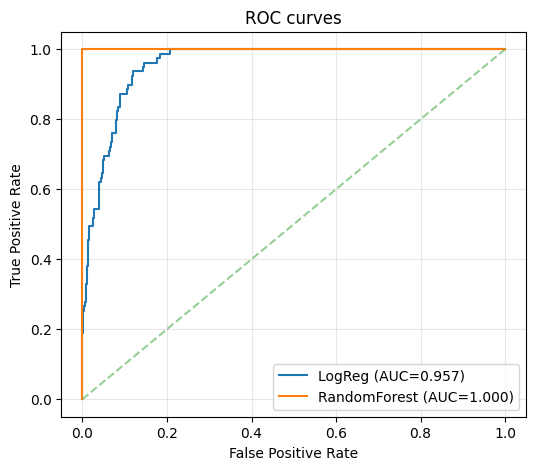

In [21]:
# LogReg
logreg = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])
logreg.fit(X_train, y_train)
proba_lr = logreg.predict_proba(X_test)[:,1]
auc_lr = roc_auc_score(y_test, proba_lr)

# RandomForest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
proba_rf = rf.predict_proba(X_test)[:,1]
auc_rf = roc_auc_score(y_test, proba_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_test, proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, proba_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC={auc_lr:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"RandomForest (AUC={auc_rf:.3f})")
plt.plot([0,1],[0,1],"--", alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


🔹 ROC křivky

LogReg: AUC ≈ 0,957 → dobrý výsledek, ale je vidět, že část „dešťů“ je matoucí.

RF: AUC = 1,000 → ideální rozdělení.

✅ Graf dobře ilustruje rozdíl – křivka RF je přitlačena k levému hornímu rohu.

# Význam znaků (RF/XGB) + Matice chyb

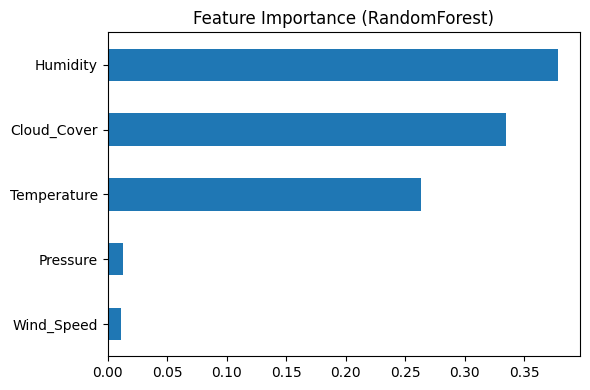

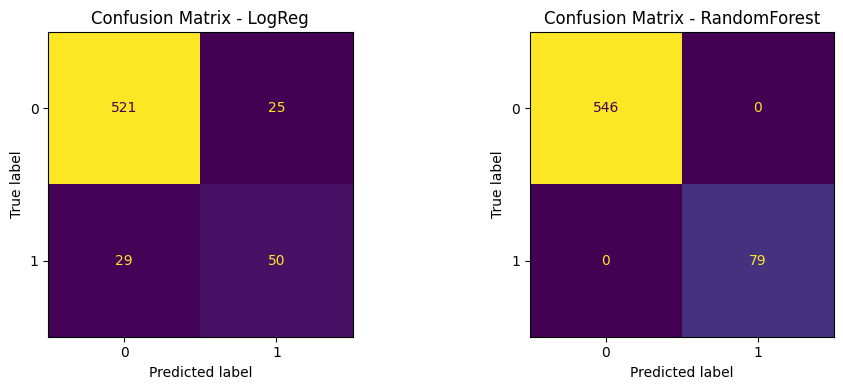

In [22]:

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(6,4))
importances.plot(kind="barh")
plt.title("Feature Importance (RandomForest)")
plt.tight_layout()
plt.show()

# Matice chyb
y_pred_lr = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

fig, ax = plt.subplots(1,2, figsize=(10,4))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr)).plot(ax=ax[0], colorbar=False)
ax[0].set_title("Confusion Matrix - LogReg")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot(ax=ax[1], colorbar=False)
ax[1].set_title("Confusion Matrix - RandomForest")
plt.tight_layout()
plt.show()


🔹 Význam znaků (RF)

Hlavní faktory:

1) Vlhkost (~0,38)

2) Oblačnost (~0,32)

3) Teplota (~0,23)
→ Tlak a rychlost větru nemají téměř žádný vliv.

✅ To se zcela shoduje s EDA (korelace).

---------------------
🔹 Matice chyb

LogReg:

* Chyby → 25 False Positive (řekla „rain“, ale nepršelo)

* a 29 False Negative (řekla „no rain“, ale pršelo).
→ To znamená, že model často zaměňuje „déšť“.

RF:

0 chyb: ideálně klasifikoval všech 625 příkladů.